# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations:

1) The cloudiness scatter plots show that there are alternating clumps of cloudiness as you move away from the equator. It is highly concentrated just south of the equator for several lat points, and a little north too, but then it drops significantly. North, it drops much quicker and holds. South, it takes a while, but does show a drop. This is probably due to the milder, warmer temperatures. And, for the southern hemisphere, the amazon jungle is only 2 points below the equator, so I imagine it contributes to the cloudiness.

2) The wind speed plots show that wind speeds are mostly 10mph or less. However, there is a higher concentration of high wind speeds the further north you go. I am not sure what would cause this - jetstreams, less civilization/buildings, or perhaps lower temperatures? It could be valuable to research futher.

3) The strongest corellation of all graphs plotted was the correlation of latitude and temperature. There is a strong negative correlation between lat and temp in the northern hemisphere - temperature quickly drops the further north you go. Interestingly, the correlation in the southern hemisphere is only moderate. Although, there seem to be less temperature readings for the southern hemisphere.

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#**For those running the code, I did implement the time.sleep(60), so it will take a while to complete**

#print statement to make print log look nice
print("Begin Data Retrieval")
print("-----------------------------")

#call openweather map
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
query_url = f"{url}appid={weather_api_key}&q="

#create empty lists for weather values
cityname = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []


#---------------------------------------------------
#loop through the list of cities and call the api
citycnt = 0
setcnt = 1
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response["clouds"]["all"])
        cityname.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        
        if citycnt > 49:
            time.sleep(60)
            citycnt = 0
            setcnt = setcnt + 1
        else:
            citycnt += 1
        
        print(f"Processing record {citycnt} of {setcnt} | {city}")
       
    except (KeyError):
        print("City not found. Skipping...")

#closing print statement, for looks
print("-----------------------------")    
print("Data Retrieval Completed!")
print("-----------------------------")

Begin Data Retrieval
-----------------------------
Processing record 1 of 1 | zabol
City not found. Skipping...
Processing record 2 of 1 | ushuaia
Processing record 3 of 1 | new norfolk
Processing record 4 of 1 | tiksi
Processing record 5 of 1 | arlit
Processing record 6 of 1 | rikitea
Processing record 7 of 1 | kununurra
Processing record 8 of 1 | bud
Processing record 9 of 1 | mataura
Processing record 10 of 1 | ozernovskiy
Processing record 11 of 1 | cherskiy
Processing record 12 of 1 | yumen
Processing record 13 of 1 | upernavik
Processing record 14 of 1 | flinders
Processing record 15 of 1 | alugan
Processing record 16 of 1 | husavik
Processing record 17 of 1 | avarua
Processing record 18 of 1 | hermanus
City not found. Skipping...
Processing record 19 of 1 | khatanga
Processing record 20 of 1 | leningradskiy
Processing record 21 of 1 | kapaa
Processing record 22 of 1 | saint anthony
City not found. Skipping...
Processing record 23 of 1 | coahuayana
Processing record 24 of 1 | hob

Processing record 2 of 5 | burnie
Processing record 3 of 5 | zhezkazgan
Processing record 4 of 5 | tevaitoa
Processing record 5 of 5 | mtwara
City not found. Skipping...
City not found. Skipping...
Processing record 6 of 5 | kathmandu
Processing record 7 of 5 | portland
Processing record 8 of 5 | clyde river
Processing record 9 of 5 | savinka
Processing record 10 of 5 | miles city
Processing record 11 of 5 | morondava
Processing record 12 of 5 | souillac
Processing record 13 of 5 | behbahan
City not found. Skipping...
Processing record 14 of 5 | prado
Processing record 15 of 5 | yerbogachen
Processing record 16 of 5 | krumovgrad
Processing record 17 of 5 | north las vegas
City not found. Skipping...
Processing record 18 of 5 | lorengau
Processing record 19 of 5 | sola
Processing record 20 of 5 | sechura
Processing record 21 of 5 | kozuchow
Processing record 22 of 5 | faya
Processing record 23 of 5 | itarema
Processing record 24 of 5 | laguna
City not found. Skipping...
Processing recor

Processing record 50 of 8 | mujiayingzi
Processing record 0 of 9 | san jeronimo
Processing record 1 of 9 | graaff-reinet
Processing record 2 of 9 | ostrovnoy
Processing record 3 of 9 | galbshtadt
Processing record 4 of 9 | cordoba
Processing record 5 of 9 | north augusta
City not found. Skipping...
Processing record 6 of 9 | gravelbourg
Processing record 7 of 9 | itaituba
Processing record 8 of 9 | port said
Processing record 9 of 9 | akureyri
Processing record 10 of 9 | samana
Processing record 11 of 9 | taos
Processing record 12 of 9 | maarianhamina
Processing record 13 of 9 | yulara
Processing record 14 of 9 | sokoni
Processing record 15 of 9 | orchard homes
Processing record 16 of 9 | omsukchan
Processing record 17 of 9 | qaqortoq
Processing record 18 of 9 | san cristobal
Processing record 19 of 9 | talnakh
City not found. Skipping...
Processing record 20 of 9 | kodinsk
Processing record 21 of 9 | sinnamary
Processing record 22 of 9 | gander
Processing record 23 of 9 | tygda
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
#create dataframe from retreived data
weather_df = pd.DataFrame({"City": cityname,
                           "Lat":lat,
                           "Lng": lng,
                           "Max Temp": max_temp,
                           "Humidity":humidity,
                           "Cloudiness":cloudiness,
                           "Wind Speed":wind_speed,
                           "Country":country,
                           "Date":date
                          }).rename_axis('City ID')

#export data to a csv
weather_df.to_csv("../output_files/city_weatherdata.csv")

#show preview of dataset
weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,Zabul Province,32.2500,67.2500,36.01,62,100,5.12,AF,1643499952
1,Ushuaia,-54.8000,-68.3000,44.26,87,100,13.80,AR,1643499462
2,New Norfolk,-42.7826,147.0587,73.65,33,13,2.01,AU,1643499466
3,Tiksi,71.6872,128.8694,-9.49,98,56,4.25,RU,1643499261
4,Arlit,18.7369,7.3853,61.97,16,1,6.67,NE,1643499955
...,...,...,...,...,...,...,...,...,...
559,Manyana,-23.4000,21.7167,71.89,72,84,14.63,BW,1643500870
560,Ngunguru,-35.6167,174.5000,72.16,64,40,11.16,NZ,1643500871
561,Lumby,50.2498,-118.9690,32.04,95,100,1.10,CA,1643500931


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
#find the max humidity reading
humiditymax = weather_df["Humidity"].max()

#if the highest humidity reading is over 100,
if humiditymax > 100:
    
    #create a dataframe of the cities where the humidity is over 100
    over100_df = weather_df.loc[weather_df["Humidity"] > 100]
    
    # Make a new DataFrame equal to the city data to drop all humidity outliers
    clean_weatherdf = weather_df[weather_df.isin(over100_df)==False].dropna()

else:
    clean_weatherdf = weather_df.copy(deep=True)
    print(f"The highest humidity reading was {humiditymax}, so we missed seeing this full section by exactly {100 - humiditymax} humidity points!")
    print(f"------------------------------------")
    print(f"If you want to check the over100_df code, change it to look for a humidity reading at {humiditymax - 10}")   

The highest humidity reading was 100, so we missed seeing this full section by exactly 0 humidity points!
------------------------------------
If you want to check the over100_df code, change it to look for a humidity reading at 90


In [107]:
#show cleaned dataframe
clean_weatherdf

#whether we had outliers or not, we will use this dataframe from here on
#because the dataset is randomized every time it is run

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,Zabul Province,32.2500,67.2500,36.01,62,100,5.12,AF,1643499952
1,Ushuaia,-54.8000,-68.3000,44.26,87,100,13.80,AR,1643499462
2,New Norfolk,-42.7826,147.0587,73.65,33,13,2.01,AU,1643499466
3,Tiksi,71.6872,128.8694,-9.49,98,56,4.25,RU,1643499261
4,Arlit,18.7369,7.3853,61.97,16,1,6.67,NE,1643499955
...,...,...,...,...,...,...,...,...,...
559,Manyana,-23.4000,21.7167,71.89,72,84,14.63,BW,1643500870
560,Ngunguru,-35.6167,174.5000,72.16,64,40,11.16,NZ,1643500871
561,Lumby,50.2498,-118.9690,32.04,95,100,1.10,CA,1643500931


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

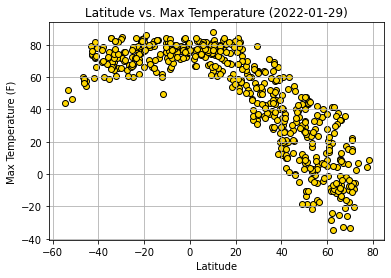

In [294]:
#create scatter plot
plt.scatter(clean_weatherdf["Lat"], clean_weatherdf["Max Temp"], facecolor = "gold", edgecolor = "black")

#convert date for plot titles
timestamp = clean_weatherdf["Date"][0]
converted_ts = datetime.utcfromtimestamp(timestamp)
short_ts = datetime.date(converted_ts)

#pretty-up the plot - turn on grid, set axis labels, add title
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"Latitude vs. Max Temperature ({short_ts})")

#save as a png
plt.savefig("../output_files/Lat_vs_Temp_plot.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

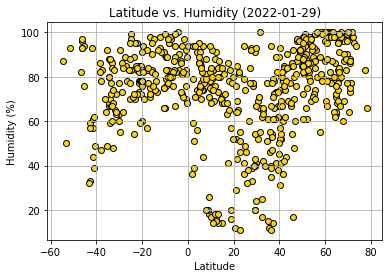

In [295]:
#create scatter plot
plt.scatter(clean_weatherdf["Lat"], clean_weatherdf["Humidity"], facecolor = "gold", edgecolor = "black")

#pretty-up the plot - turn on grid, set axis labels, add title
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude vs. Humidity ({short_ts})")

#save as a png
plt.savefig("../output_files/Lat_vs_Humidity_plot.png")

#show plot
plt.show()

## Latitude vs. Cloudiness Plot

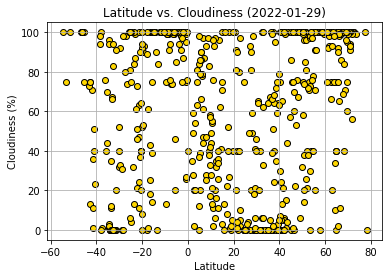

In [296]:
#create scatter plot
plt.scatter(clean_weatherdf["Lat"], clean_weatherdf["Cloudiness"], facecolor = "gold", edgecolor = "black")

#pretty-up the plot - turn on grid, set axis labels, add title
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude vs. Cloudiness ({short_ts})")

#save as a png
plt.savefig("../output_files/Lat_vs_Cloudiness_plot.png")

#show plot
plt.show()

## Latitude vs. Wind Speed Plot

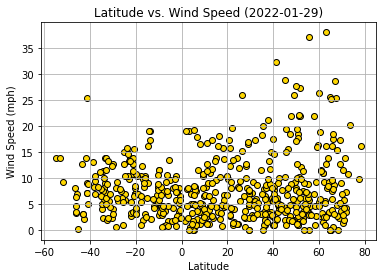

In [297]:
#create scatter plot
plt.scatter(clean_weatherdf["Lat"], clean_weatherdf["Wind Speed"], facecolor = "gold", edgecolor = "black")

#pretty-up the plot - turn on grid, set axis labels, add title
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Latitude vs. Wind Speed ({short_ts})")

#save as a png
plt.savefig("../output_files/Lat_vs_WindSpeed_plot.png")

#show plot
plt.show()

## Linear Regression

In [284]:
#create linear regression equation
def linreg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #plot the graph and regression line
    plt.scatter(x,y, facecolor="gold", edgecolor="black")
    plt.plot(x,regress_values, "k-")
    
    #add line equation to plot, axis labels, title
    plt.annotate(line_eq, (x.min(),y.min()), fontsize=15, color = "black")
    plt.xlabel("Latitude")
    
    #print r-squared
    print(f"The r-squared is: {rvalue}")

In [285]:
#create Northern and Southern Hemisphere dataframes
NorthH = clean_weatherdf.loc[clean_weatherdf["Lat"]>=0]
SouthH = clean_weatherdf.loc[clean_weatherdf["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8668688538269551
None


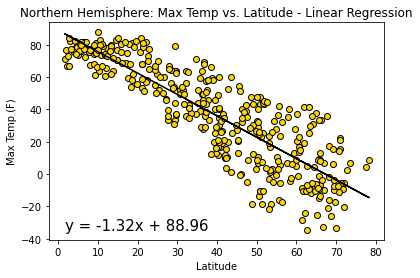

In [286]:
#set x and y
x = NorthH["Lat"]
y = NorthH["Max Temp"]

#set y label and title
plt.ylabel("Max Temp (F)")
plt.title("Northern Hemisphere: Max Temp vs. Latitude - Linear Regression")


#save as a png
plt.savefig("../output_files/NH_MaxTemp_Lat_plot.png")

#print equation line
print(linreg(x,y))

There is a strong negative correlation between latitude and max temp for the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.45275418702051595
None


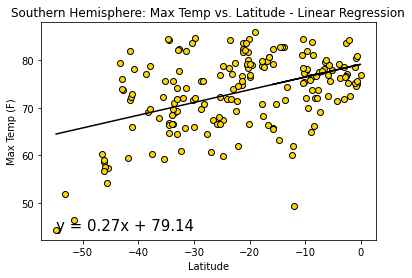

In [287]:
#set x and y
x = SouthH["Lat"]
y = SouthH["Max Temp"]

#set y label and title
plt.ylabel("Max Temp (F)")
plt.title("Southern Hemisphere: Max Temp vs. Latitude - Linear Regression")

#save as a png
plt.savefig("../output_files/SH_MaxTemp_Lat_plot.png")

#print equation line
print(linreg(x,y))

There is a moderate positive correlation between latitude and max temp for the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3760783665514557
None


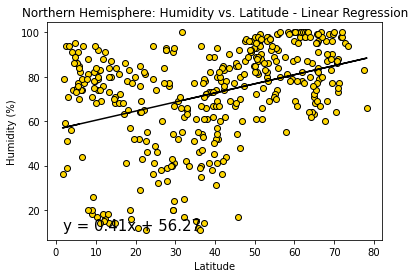

In [288]:
#set x and y
x = NorthH["Lat"]
y = NorthH["Humidity"]

#set y label and title
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere: Humidity vs. Latitude - Linear Regression")


#save as a png
plt.savefig("../output_files/NH_Humidity_Lat_plot.png")

#print equation line
print(linreg(x,y))

There is a moderate positive correlation between latitude and humidity for the northern hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.36093528543978926
None


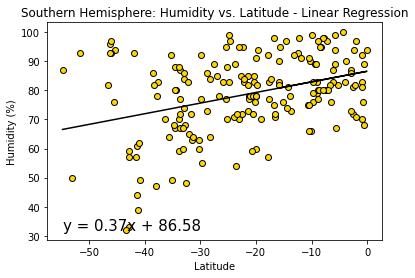

In [289]:
#set x and y
x = SouthH["Lat"]
y = SouthH["Humidity"]

#set y label and title
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere: Humidity vs. Latitude - Linear Regression")


#save as a png
plt.savefig("../output_files/SH_Humidity_Lat_plot.png")

#print equation line
print(linreg(x,y))

There is a moderate positive correlation between latitude and humidity for the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.37590888258577965
None


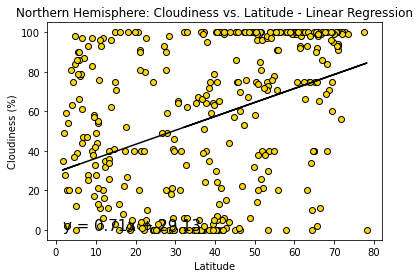

In [290]:
#set x and y
x = NorthH["Lat"]
y = NorthH["Cloudiness"]

#set y label and title
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere: Cloudiness vs. Latitude - Linear Regression")


#save as a png
plt.savefig("../output_files/NH_Cloudiness_Lat_plot.png")

#print equation line
print(linreg(x,y))

There is a moderate positive correlation between latitude and cloudiness for the moderate hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3115244438590607
None


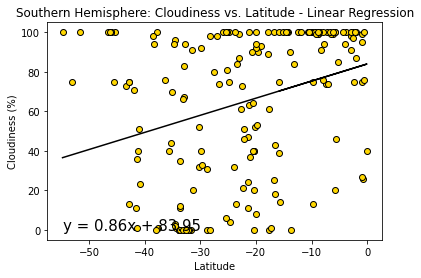

In [291]:
#set x and y
x = SouthH["Lat"]
y = SouthH["Cloudiness"]

#set y label and title
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere: Cloudiness vs. Latitude - Linear Regression")


#save as a png
plt.savefig("../output_files/SH_Cloudiness_Lat_plot.png")

#print equation line
print(linreg(x,y))

There is a moderate positive correlation between latitude and cloudiness for the southern hemisphere

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1269332793201742
None


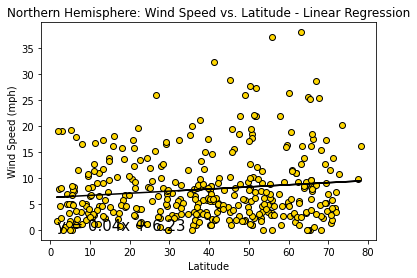

In [292]:
#set x and y
x = NorthH["Lat"]
y = NorthH["Wind Speed"]

#set y label and title
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere: Wind Speed vs. Latitude - Linear Regression")


#save as a png
plt.savefig("../output_files/NH_WindSpeed_Lat_plot.png")

#print equation line
print(linreg(x,y))

There is a weak positive correlation between latitude and wind speed for the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18595068334642248
None


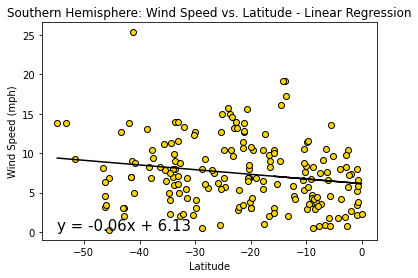

In [293]:
#set x and y
x = SouthH["Lat"]
y = SouthH["Wind Speed"]

#set y label and title
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere: Wind Speed vs. Latitude - Linear Regression")


#save as a png
plt.savefig("../output_files/SH_WindSpeed_Lat_plot.png")

#print equation line
print(linreg(x,y))

There is a weak negative correlation between latitude and wind speed for the southern hemisphere